In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from copy import deepcopy
from statsmodels.stats.multitest import multipletests
from scipy.stats import hypergeom
from difflib import get_close_matches

# Load pickles

In [2]:
wdir = '/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/'
li = pandas.read_pickle('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/li_modules.pk')
miller = pandas.read_pickle(os.path.join(wdir,'Miller_modules.pk'))
lake = pandas.read_pickle(os.path.join(wdir,'lake_cells.pk'))

# Get component info

In [3]:
# c1 = pandas.read_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/RotAvg_C1.csv',
#                     index_col=0)
# c1 = pandas.pivot_table(data=c1,values=c1.columns[0],
#                         index='gene_symbol')
# c1.columns = ['expr']
# c1 = c1.sort_values('expr',ascending=True)
# c2 = pandas.read_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/RotAvg_C2.csv',
#                     index_col=0)
# c2 = pandas.pivot_table(data=c2,values=c2.columns[0],
#                         index='gene_symbol')
# c2.columns = ['expr']
# c2 = c2.sort_values('expr',ascending=True)
# c3 = pandas.read_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/RotAvg_C3.csv',
#                     index_col=0)
# c3 = pandas.pivot_table(data=c3,values=c3.columns[0],
#                         index='gene_symbol')
# c3.columns = ['expr']
# c3 = c3.sort_values('expr',ascending=True)

In [2]:
c1 = pandas.read_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/RotAvg_C1_full.csv',
                    index_col=0)
c1 = pandas.pivot_table(data=c1,values=c1.columns[0],
                        index='gene_symbol')
c1.columns = ['expr']
c1 = c1.sort_values('expr',ascending=True)
c2 = pandas.read_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/RotAvg_C2_full.csv',
                    index_col=0)
c2 = pandas.pivot_table(data=c2,values=c2.columns[0],
                        index='gene_symbol')
c2.columns = ['expr']
c2 = c2.sort_values('expr',ascending=True)
c3 = pandas.read_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/RotAvg_C3_full.csv',
                    index_col=0)
c3 = pandas.pivot_table(data=c3,values=c3.columns[0],
                        index='gene_symbol')
c3.columns = ['expr']
c3 = c3.sort_values('expr',ascending=True)

In [11]:
# for enrichment
thresh = 0.01
cut = int(len(c1) * thresh)
bot_c1 = np.unique(c1.index.values[:cut])
bot_c2 = np.unique(c2.index.values[:cut])
bot_c3 = np.unique(c3.index.values[:cut])

cut2 = len(c1) - cut
top_c1 = np.unique(c1.index.values[cut2:])
top_c2 = np.unique(c2.index.values[cut2:])
top_c3 = np.unique(c3.index.values[cut2:])

In [10]:
c1.index = [x.replace('.','_') for x in c1.index]
c2.index = [x.replace('.','_') for x in c2.index]
c3.index = [x.replace('.','_') for x in c2.index]

In [12]:
for x in bot_c3:
    print(x)

AC006273_1
AC044839_2
AC092324_1
ADAM28
ADAMTS3
AGXT2L1
AKAP14
AMIGO2
ANKRD34B
ANKRD6
ANO3
APBB1IP
APLNR
APOC1
AQP1
AQP4
ARHGAP15
ARHGAP28
ARHGAP6
ARHGEF5L
ASCL2
ATBF1
A_23_P102331
A_23_P104484
A_23_P113101
A_23_P169319
A_23_P343382
A_23_P344673
A_23_P37785
A_23_P40290
A_24_P101282
A_24_P119678
A_24_P127691
A_24_P355246
A_24_P372189
A_24_P511686
A_24_P514678
A_24_P525749
A_24_P546043
A_24_P586072
A_24_P627874
A_24_P637651
A_24_P659202
A_24_P673968
A_24_P816844
A_24_P910566
A_24_P911718
A_24_P924681
A_24_P92823
A_32_P102581
A_32_P111873
A_32_P115840
A_32_P121549
A_32_P146485
A_32_P166653
A_32_P184330
A_32_P232413
A_32_P28223
A_32_P29618
A_32_P31963
A_32_P33304
A_32_P3431
A_32_P34941
A_32_P45229
A_32_P50834
A_32_P59277
A_32_P64286
A_32_P73903
A_32_P86802
A_32_P90113
A_32_P9207
BAIAP3
BIRC3
C10orf105
C12ORF75
C16orf73
C1orf95
C3orf55
C4A
C6ORF141
C6orf173
CALB2
CAPSL
CCBE1
CCDC109B
CD38
CD6
CDH8
CFD
CHODL
CHRDL2
COCH
COL21A1
CORT
CPLX3
CPNE6
CPNE7
CRHBP
CRNDE
CTD-2536I1_1
CTXN3
CUST_2576_

# Get the enrichment results

In [14]:
# miller
n_iter = 1000

full_list = c1.index
shuffler = deepcopy(full_list)

N = len(full_list)
p_res_miller = pandas.DataFrame(index=miller.keys())
for mod in miller.keys():
    print('working on',mod)
    B = len(miller[mod])
    n = cut
    p_res_miller.loc[mod,'N'] = N
    p_res_miller.loc[mod,'B'] = B
    p_res_miller.loc[mod,'n'] = n
#     rand_Es = []
#     for i in range(n_iter):
#         np.random.shuffle(shuffler)
#         glist = shuffler[:cut]
#         rand_b = len(set(glist) & set(miller[mod]))
#         rand_enr = (rand_b/n) / (B/N)
#         rand_Es.append(rand_enr)
#     rand_Es = np.array(rand_Es)
    for i,comp in enumerate([top_c1,top_c2,top_c3]):
        match = set(comp) & set(miller[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        #p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        p = hypergeom.sf(b, N, B, n)
#         if p <0.001:
#             p = 0.0001
        p_res_miller.loc[mod,'Top_C%s_b'%(i+1)] = b
        p_res_miller.loc[mod,'Top_C%s_Enrichment'%(i+1)] = enr
        p_res_miller.loc[mod,'Top_C%s_p'%(i+1)] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res_miller.loc[mod,'Top_C%s_genes'%(i+1)] = genes
    for i,comp in enumerate([bot_c1,bot_c2,bot_c3]):
        match = set(comp) & set(miller[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        #p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        p = hypergeom.sf(b, N, B, n)
#         if p <0.001:
#             p = 0.0001
        p_res_miller.loc[mod,'Btm_C%s_b'%(i+1)] = b
        p_res_miller.loc[mod,'Btm_C%s_Enrichment'%(i+1)] = enr
        p_res_miller.loc[mod,'Btm_C%s_p'%(i+1)] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res_miller.loc[mod,'Btm_C%s_genes'%(i+1)] = genes

working on C32
working on C34
working on C33
working on C38
working on C10
working on C7
working on C9
working on C17
working on C1
working on C19
working on C13
working on C4
working on C12
working on C27
working on C35
working on C25
working on C31
working on C23
working on C37
working on C30
working on C24
working on C18
working on C21
working on C3
working on C42
working on C14
working on C39
working on C11
working on C6
working on C40
working on C2
working on C15
working on C29
working on C5
working on C41
working on C22
working on C26
working on C8
working on C36
working on C16
working on C28
working on C20


/home/users/jvogel/gxp/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/users/jvogel/gxp/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


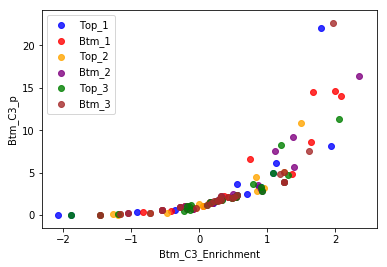

In [19]:
colors = ['blue','orange','green','red','purple','brown'] 
for i in range(1,4):
    sns.regplot(x=np.log(p_res_miller['Top_C%s_Enrichment'%i]),
                y=-np.log(p_res_miller['Top_C%s_p'%i]),
               color=colors[i-1],label='Top_%s'%i)
    sns.regplot(x=np.log(p_res_miller['Btm_C%s_Enrichment'%i]),
                y=-np.log(p_res_miller['Btm_C%s_p'%i]),
               color=colors[i+2],label='Btm_%s'%i)
    plt.legend()
    #plt.show()

In [20]:
# lake
n_iter = 1000

full_list = c1.index
#shuffler = deepcopy(full_list)

N = len(full_list)
p_res_lake = pandas.DataFrame(index=lake.keys())
for mod in lake.keys():
    print('working on',mod)
    B = len(lake[mod])
    n = cut
    p_res_lake.loc[mod,'N'] = N
    p_res_lake.loc[mod,'B'] = B
    p_res_lake.loc[mod,'n'] = n
#     rand_Es = []
#     for i in range(n_iter):
#         np.random.shuffle(shuffler)
#         glist = shuffler[:cut]
#         rand_b = len(set(glist) & set(miller[mod]))
#         rand_enr = (rand_b/n) / (B/N)
#         rand_Es.append(rand_enr)
#     rand_Es = np.array(rand_Es)
    for i,comp in enumerate([top_c1,top_c2,top_c3]):
        match = set(comp) & set(lake[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        #p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        p = hypergeom.sf(b, N, B, n)
#         if p <0.001:
#             p = 0.0001
        p_res_lake.loc[mod,'Top_C%s_b'%(i+1)] = b
        p_res_lake.loc[mod,'Top_C%s_Enrichment'%(i+1)] = enr
        p_res_lake.loc[mod,'Top_C%s_p'%(i+1)] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res_lake.loc[mod,'Top_C%s_genes'%(i+1)] = genes
    for i,comp in enumerate([bot_c1,bot_c2,bot_c3]):
        match = set(comp) & set(lake[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        #p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        p = hypergeom.sf(b, N, B, n)
#         if p <0.001:
#             p = 0.0001
        p_res_lake.loc[mod,'Btm_C%s_b'%(i+1)] = b
        p_res_lake.loc[mod,'Btm_C%s_Enrichment'%(i+1)] = enr
        p_res_lake.loc[mod,'Btm_C%s_p'%(i+1)] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res_lake.loc[mod,'Btm_C%s_genes'%(i+1)] = genes

working on OPC
working on Ast_Cer
working on Ex3e
working on Ex8
working on In6b
working on Purk2
working on Ex3d
working on Oli
working on Gran
working on Ex3c
working on Ex4
working on In1b
working on In2
working on In8
working on Ex5a
working on Mic
working on End
working on Ex3a
working on Ex5b
working on Ex6a
working on Ex6b
working on Ex3b
working on In4a
working on In1a
working on Ast
working on Ex1
working on Purk1
working on Per
working on OPC_Cer
working on In6a
working on In3
working on In7
working on In4b
working on Ex2
working on In1c


/home/users/jvogel/gxp/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/users/jvogel/gxp/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


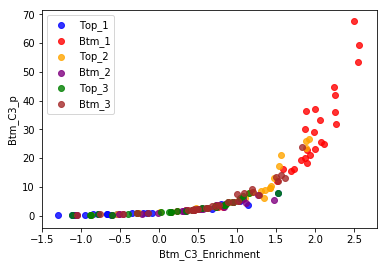

In [21]:
colors = ['blue','orange','green','red','purple','brown'] 
for i in range(1,4):
    sns.regplot(x=np.log(p_res_lake['Top_C%s_Enrichment'%i]),
                y=-np.log(p_res_lake['Top_C%s_p'%i]),
               color=colors[i-1],label='Top_%s'%i)
    sns.regplot(x=np.log(p_res_lake['Btm_C%s_Enrichment'%i]),
                y=-np.log(p_res_lake['Btm_C%s_p'%i]),
               color=colors[i+2],label='Btm_%s'%i)
    plt.legend()
    #plt.show()

In [22]:
# li
n_iter = 1000

full_list = c1.index
#shuffler = deepcopy(full_list)

N = len(full_list)
p_res_li = pandas.DataFrame(index=li.keys())
for mod in li.keys():
    print('working on',mod)
    B = len(li[mod])
    n = cut
    p_res_li.loc[mod,'N'] = N
    p_res_li.loc[mod,'B'] = B
    p_res_li.loc[mod,'n'] = n
#     rand_Es = []
#     for i in range(n_iter):
#         np.random.shuffle(shuffler)
#         glist = shuffler[:cut]
#         rand_b = len(set(glist) & set(miller[mod]))
#         rand_enr = (rand_b/n) / (B/N)
#         rand_Es.append(rand_enr)
#     rand_Es = np.array(rand_Es)
    for i,comp in enumerate([top_c1,top_c2,top_c3]):
        match = set(comp) & set(li[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        #p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        p = hypergeom.sf(b, N, B, n)
#         if p <0.001:
#             p = 0.0001
        p_res_li.loc[mod,'Top_C%s_b'%(i+1)] = b
        p_res_li.loc[mod,'Top_C%s_Enrichment'%(i+1)] = enr
        p_res_li.loc[mod,'Top_C%s_p'%(i+1)] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res_li.loc[mod,'Top_C%s_genes'%(i+1)] = genes
    for i,comp in enumerate([bot_c1,bot_c2,bot_c3]):
        match = set(comp) & set(li[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        #p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        p = hypergeom.sf(b, N, B, n)
#         if p <0.001:
#             p = 0.0001
        p_res_li.loc[mod,'Btm_C%s_b'%(i+1)] = b
        p_res_li.loc[mod,'Btm_C%s_Enrichment'%(i+1)] = enr
        p_res_li.loc[mod,'Btm_C%s_p'%(i+1)] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res_li.loc[mod,'Btm_C%s_genes'%(i+1)] = genes

working on ME71
working on ME50
working on ME28
working on ME32
working on ME45
working on ME58
working on ME29
working on ME4
working on ME55
working on ME42
working on ME24
working on ME36
working on ME63
working on ME70
working on ME30
working on ME73
working on ME51
working on ME7
working on ME8
working on ME16
working on ME56
working on ME59
working on ME6
working on ME17
working on ME60
working on ME9
working on ME61
working on ME2
working on ME46
working on ME66
working on ME41
working on ME47
working on ME72
working on ME31
working on ME26
working on ME53
working on ME39
working on ME64
working on ME54
working on ME69
working on ME65
working on ME67
working on ME40
working on ME49
working on ME44
working on ME1
working on ME10
working on ME37
working on ME3
working on ME14
working on ME23
working on ME27
working on ME68
working on ME21
working on ME5
working on ME13
working on ME25
working on ME11
working on ME38
working on ME15
working on ME33
working on ME22
working on ME12
w

/home/users/jvogel/gxp/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/users/jvogel/gxp/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


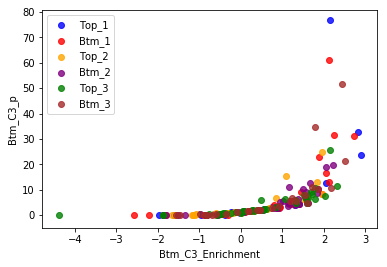

In [23]:
colors = ['blue','orange','green','red','purple','brown'] 
for i in range(1,4):
    sns.regplot(x=np.log(p_res_li['Top_C%s_Enrichment'%i]),
                y=-np.log(p_res_li['Top_C%s_p'%i]),
               color=colors[i-1],label='Top_%s'%i)
    sns.regplot(x=np.log(p_res_li['Btm_C%s_Enrichment'%i]),
                y=-np.log(p_res_li['Btm_C%s_p'%i]),
               color=colors[i+2],label='Btm_%s'%i)
    plt.legend()
    #plt.show()

In [24]:
enrs = {'li':p_res_li,'lake':p_res_lake,'miller':p_res_miller}

In [25]:
glists = dict(zip(['BtmC1','TopC1','BtmC2','TopC2','BtmC3','TopC3'], 
                  [bot_c1,top_c1,bot_c2,top_c2,bot_c3,top_c3]))

In [29]:
gos = sorted(glob('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/webgestalt_gsea/*C*/enrichment_results*.txt'))
grefs = {}
go_dict = {}
for go_pth in gos:
    nm = go_pth.split('/')[-2]
    go = pandas.read_csv(go_pth,sep='\t')
    ref = pandas.DataFrame(np.zeros((len(glists[nm]),len(go))),
                       index=glists[nm],columns=go.description)
    for i,row in go.iterrows():
        genes = row['userId'].split(';')
        ref.loc[genes,row['description']] = 1
    ref.drop([x for x in ref.index if all(ref.loc[x].values == 0)],
         inplace=True)
    grefs.update({nm:ref})
    go_dict.update({nm:go})

In [32]:
pandas.to_pickle(enrs,os.path.join(wdir,'li_lake_miller_enr.pk'))
pandas.to_pickle(grefs,os.path.join(wdir,'wg_graph.pk'))
pandas.to_pickle(glists,os.path.join(wdir,'top_gene_lists.pk'))
pandas.to_pickle(go_dict,os.path.join(wdir,'wg_results.pk'))

In [33]:
enrs = pandas.read_pickle(os.path.join(wdir,'li_lake_miller_enr.pk'))
grefs = pandas.read_pickle(os.path.join(wdir,'wg_graph.pk'))
go_dict = pandas.read_pickle(os.path.join(wdir,'wg_results.pk'))
glists = pandas.read_pickle(os.path.join(wdir,'top_gene_lists.pk'))

In [38]:
for cat,enr in enrs.items():
    enr.loc[:,'Category'] = cat

In [41]:
all_enr = pandas.concat([enrs['lake'],
                         enrs['li'],
                         enrs['miller']],
                        axis=0)
for c in ['Top_C1','Top_C2','Top_C3',
          'Btm_C1','Btm_C2','Btm_C3']:
    fdrq = multipletests(all_enr[c+'_p'].values,
                         method='fdr_bh')[1]
    all_enr.loc[:,c+'_FDR'] = fdrq

In [44]:
for c in ['Top_C1','Top_C2','Top_C3',
          'Btm_C1','Btm_C2','Btm_C3']:
    print(c,len(all_enr[all_enr[c+'_FDR']<0.1]))

Top_C1 9
Top_C2 31
Top_C3 27
Btm_C1 47
Btm_C2 32
Btm_C3 28


In [58]:
col_order = ['geneSet', 'description','pValue', 'FDR','size', 
             'overlap','enrichmentRatio','database','userId']
enr_FDR = 0.1
gmt_dict = {}
fgo_dict = {} 
for nm,go in go_dict.items():
    print('working on',nm)
    # get names for other (enrs) spreadsheet
    jnk=nm.split('C')
    enm = '%s_C%s'%(jnk[0],int(jnk[1]))
    # reindex for cytoscape
    go = go[col_order]
    go.loc[:,'ES_database'] = go.database.values
    go.drop('database',axis=1,inplace=True)
    # fill in
    # get enr df
    curr_enr = all_enr[all_enr['%s_FDR'%enm]<enr_FDR]
    # build gmt
    wgmax = np.max([len(go.loc[x,'userId'].split(';'))\
                    for x in go.index])
    enrmax = np.max([len(curr_enr.loc[x,'%s_genes'%enm
                                    ].strip().split(" "))\
                     for x in curr_enr.index])
    jnk = [wgmax,enrmax]
    ncols = jnk[np.argmax(jnk)]
    nrows = len(go)+len(curr_enr)
    gmt = pandas.DataFrame(index=range(nrows),columns=range(ncols+2))
    # begin populating gmt
    for i,row in go.iterrows():
        gmt.loc[i,0] = row['geneSet']
        gmt.loc[i,1] = row['description']
        genes = row['userId'].split(';')
        gmt.loc[i,2:len(genes)+1] = genes
    # add enr data to go spreadsheet and gmt
    fullgo = pandas.DataFrame(go,copy=True)
    i = len(fullgo)
    first = True
    j = len(gmt)
    for ind,row in curr_enr.iterrows():
        fullgo.loc[i,'geneSet'] = ind
        fullgo.loc[i,'description'] = ind
        gmt.loc[j,0] = ind
        gmt.loc[j,1] = ind
        fullgo.loc[i,'size'] = row['B']
        fullgo.loc[i,'overlap'] = row['%s_b'%enm]
        fullgo.loc[i,'enrichmentRatio'] = row['%s_Enrichment'%enm]
        fullgo.loc[i,'pValue'] = row['%s_p'%enm]
        fullgo.loc[i,'FDR'] = row['%s_FDR'%enm]
        fullgo.loc[i,'ES_database'] = row['Category']
        fullgo.loc[i,'userId'] = row['%s_genes'%enm]
        genes = row['%s_genes'%enm].strip().split(' ')
        gmt.loc[j,2:len(genes)+1] = genes
        if first:
            i+=2
            j+=2
            first = False
        else:
            i+=1
            j+=1
    
    gmt_dict.update({nm: gmt})
    fgo_dict.update({nm: fullgo})
    gmt.to_csv(os.path.join(wdir,'%s_gmt.gmt'%nm),sep='\t',index=False)
    fullgo.to_csv(os.path.join(wdir,'%s_modifiedGo.txt'%nm),sep='\t',index=False)
    
    

working on BtmC2
working on TopC3
working on TopC1
working on BtmC1
working on TopC2
working on BtmC3


In [57]:
jnk = pandas.read_csv('~/Science/Allen_Human_Brain_Atlas/NEUR608/HBM/TopC1_modifiedGo.txt',
                     sep='\t')
jnk

,geneSet,description,pValue,FDR,size,overlap,enrichmentRatio,userId,ES_dataset,ES_database
0,GO:0048706,embryonic skeletal system development,6.106227e-15,2.701395e-11,120.0,17.0,13.610119,HOXA2;HOXA4;HOXA5;HOXA6;HOXA7;HOXB2;HOXB3;HOXB...,geneontology_Biological_Process_noRedundant,NaN
1,GO:0048705,skeletal system morphogenesis,1.767697e-12,3.910146e-09,223.0,19.0,8.185458,ANXA2;COL13A1;CYP26B1;HOXA2;HOXA4;HOXA5;HOXA6;...,geneontology_Biological_Process_noRedundant,NaN
2,GO:0007389,pattern specification process,3.859486e-10,5.691455e-07,418.0,22.0,5.056391,CELSR1;CYP26B1;HOXA2;HOXA4;HOXA5;HOXA6;HOXA7;H...,geneontology_Biological_Process_noRedundant,NaN
3,GO:0048568,embryonic organ development,1.435858e-09,1.588059e-06,407.0,21.0,4.957002,CELSR1;HOXA2;HOXA4;HOXA5;HOXA6;HOXA7;HOXB2;HOX...,geneontology_Biological_Process_noRedundant,NaN
4,C0036341,Schizophrenia,2.045582e-06,1.809931e-03,962.0,27.0,2.696391,ALDH1A1;BTG1;CELSR1;CHGB;CHRNA3;CYP26B1;DAO;DD...,disease_Disgenet,NaN
5,GO:0021675,nerve development,7.256783e-06,5.350668e-03,69.0,7.0,9.746377,HOXB2;HOXB3;HOXD3;NTF3;PAX2;POU4F1;TFAP2A,geneontology_Biological_Process_noRedundant,NaN
6,GO:0030902,hindbrain development,1.745266e-05,1.103008e-02,142.0,9.0,6.089034,CBLN1;HOXA2;HOXB2;HOXB3;LHX1;NEUROD1;NEUROD2;P...,geneontology_Biological_Process_noRedundant,NaN
7,C0001973,"Alcoholic Intoxication, Chronic",3.077303e-05,1.701749e-02,275.0,12.0,4.192208,ALDH1A1;BAG3;CDH15;CHRNA3;GRM4;HTR2C;IL1B;NEUR...,disease_Disgenet,NaN
8,GO:0090596,sensory organ morphogenesis,4.260827e-05,2.094433e-02,240.0,11.0,4.403274,CELSR1;COL8A2;CYP26B1;HOXA2;IRX5;LHX1;MEIS1;PA...,geneontology_Biological_Process_noRedundant,NaN
9,GO:0030856,regulation of epithelial cell differentiation,8.331611e-05,3.685905e-02,135.0,8.0,5.693122,AQP3;BTG1;CD24;HOXA7;IL1B;LHX1;PAX2;PAX8,geneontology_Biological_Process_noRedundant,NaN
